In [1]:
from tensorflow import keras
from tensorflow.keras.models import Sequential

import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, BatchNormalization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.layers import LSTM, Dense

from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.model_selection import cross_val_score

In [191]:
# 데이터 불러오기
df = pd.read_csv('../data/df.csv')

In [3]:
df.head()

,동,단지명,전용면적,계약년월,층,건축년도,금리,부동산소비심리,보증금
0,165,2059,79.97,201601,4,1987,1.5,117.6,44000
1,165,2059,79.97,201601,3,1987,1.5,117.6,42000
2,165,453,133.46,201601,8,1984,1.5,117.6,80000
3,165,453,104.43,201601,6,1984,1.5,117.6,52000
4,165,453,104.43,201601,3,1984,1.5,117.6,55000


In [4]:
df.describe()

,동,단지명,전용면적,계약년월,층,건축년도,금리,부동산소비심리,보증금
count,320979.000000,320979.000000,320979.000000,320979.000000,320979.000000,320979.000000,320979.000000,320979.000000,320979.000000
mean,153.538200,2682.592419,76.076619,201711.545668,10.691213,1998.759458,1.388802,118.405118,39010.146888
std,88.406449,1679.933238,26.141417,82.104811,5.780531,10.723342,0.140256,8.987102,18613.787295
min,0.000000,0.000000,10.110000,201601.000000,0.000000,1961.000000,1.250000,93.900000,500.000000
25%,70.000000,1352.000000,59.680000,201610.000000,6.000000,1990.000000,1.250000,113.100000,26000.000000
50%,159.000000,2269.000000,80.920000,201707.000000,10.000000,1999.000000,1.500000,119.200000,37000.000000
75%,235.000000,3925.000000,84.960000,201804.000000,14.000000,2007.000000,1.500000,126.300000,50000.000000
max,331.000000,6632.000000,317.360000,201812.000000,68.000000,2018.000000,1.750000,134.100000,100000.000000


In [192]:
# 정규화하기
# MinMaxScaler 클래스 생성
scaler = MinMaxScaler()

# MinMaxScaler 클래스의 fit_transform() 메서드 사용 데이터 정규화
normalized_data = scaler.fit_transform(df)

# 정규화된 데이터, 데이터 프레임으로 다시 변환
normalized_df = pd.DataFrame(normalized_data, columns=df.columns)

In [193]:
normalized_df.head()

,동,단지명,전용면적,계약년월,층,건축년도,금리,부동산소비심리,보증금
0,0.498489,0.310464,0.227372,0.0,0.058824,0.456140,0.5,0.589552,0.437186
1,0.498489,0.310464,0.227372,0.0,0.044118,0.456140,0.5,0.589552,0.417085
2,0.498489,0.068305,0.401465,0.0,0.117647,0.403509,0.5,0.589552,0.798995
3,0.498489,0.068305,0.306981,0.0,0.088235,0.403509,0.5,0.589552,0.517588
4,0.498489,0.068305,0.306981,0.0,0.044118,0.403509,0.5,0.589552,0.547739


In [194]:
ndf = normalized_df.copy()

In [195]:
# 데이터 나누기
X = ndf.iloc[:, :-1]
y = ndf.iloc[:,[-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [196]:
pd.DataFrame(X_test).to_csv('../data/X_test.csv', index=False)
pd.DataFrame(y_test).to_csv('../data/y_test.csv', index=False)

In [197]:
X_test = pd.read_csv('../data/X_test.csv')
y_test = pd.read_csv('../data/y_test.csv')

In [198]:
X_test.head()

,동,단지명,전용면적,계약년월,층,건축년도,금리,부동산소비심리
0,0.241692,0.155308,0.243124,0.037915,0.264706,0.929825,0.0,0.833333
1,0.725076,0.625452,0.243320,0.023697,0.073529,0.649123,0.0,0.813433
2,0.507553,0.744572,0.235118,0.023697,0.088235,0.754386,0.0,0.813433
3,0.274924,0.103136,0.094353,0.990521,0.161765,1.000000,0.5,0.527363
4,0.746224,0.831876,0.143792,0.947867,0.205882,0.491228,0.5,0.818408


In [199]:
y_test.head()

,보증금
0,0.577889
1,0.336683
2,0.175879
3,0.427136
4,0.201005


In [200]:
print(X_train.shape)
print(y_train.shape)

(256783, 8)
(256783, 1)


In [201]:
print(X_test.shape)
print(y_test.shape)

(64196, 8)
(64196, 1)


In [202]:
model = Sequential()
model.add(LSTM(128, input_shape=(ndf.shape[1] - 1, 1)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mse')

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 128)               66560     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 74,881
Trainable params: 74,881
Non-trainable params: 0
_________________________________________________________________


In [203]:
model.fit(X_train, y_train, epochs=40, batch_size=32, verbose=1)

Epoch 1/40
8025/8025 [==============================] - 37s 4ms/step - loss: 0.0104
Epoch 2/40
8025/8025 [==============================] - 35s 4ms/step - loss: 0.0060
Epoch 3/40
8025/8025 [==============================] - 35s 4ms/step - loss: 0.0058
Epoch 4/40
8025/8025 [==============================] - 35s 4ms/step - loss: 0.0056
Epoch 5/40
8025/8025 [==============================] - 35s 4ms/step - loss: 0.0055
Epoch 6/40
8025/8025 [==============================] - 35s 4ms/step - loss: 0.0054
Epoch 7/40
8025/8025 [==============================] - 35s 4ms/step - loss: 0.0053
Epoch 8/40
8025/8025 [==============================] - 36s 4ms/step - loss: 0.0052
Epoch 9/40
8025/8025 [==============================] - 36s 4ms/step - loss: 0.0051
Epoch 10/40
8025/8025 [==============================] - 36s 4ms/step - loss: 0.0050
Epoch 11/40
8025/8025 [==============================] - 36s 4ms/step - loss: 0.0050
Epoch 12/40
8025/8025 [==============================] - 36s 4ms/step - lo

In [204]:
pred = model.predict(X_test)
print(y_test.shape, pred.shape)

2007/2007 [==============================] - 4s 2ms/step
(64196, 1) (64196, 1)


In [161]:
# 실제값과 예측값을 계약년월별 평균값으로 계산
predictions = np.array(pred)
actual_values = np.array(y_test)

In [19]:
contract_year_predictions = np.array([predictions[i:i + 12].mean() for i in range(0, len(predictions), 12)])
contract_year_actual_values = np.array([actual_values[i:i + 12].mean() for i in range(0, len(actual_values), 12)])

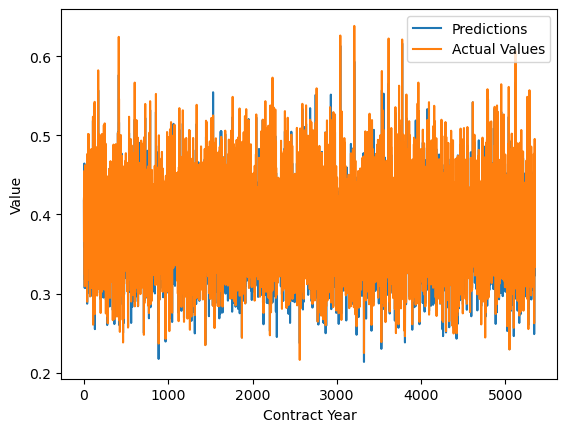

In [20]:
plt.plot(contract_year_predictions, label="Predictions", linestyle='solid')
plt.plot(contract_year_actual_values, label="Actual Values")
plt.xlabel("Contract Year")
plt.ylabel("Value")
plt.legend()
plt.show()

In [162]:
# RMSE를 계산(낮을 수록 정확함)
rmse = mean_squared_error(y_test, predictions)
print('rmse :',rmse)

# R^2을 계산(R^2가 1에 가까울수록 모델이 데이터를 잘 설명)
r2 = r2_score(y_test, predictions)
print('r2 :',r2)

# MAE를 계산(MAE가 낮을수록 예측값과 실제값이 가까워짐)
mae = mean_absolute_error(y_test, predictions)
print('mae :',mae)

rmse : 0.003561839773680661
r2 : 0.8990196657810539
mae : 0.03827930011207608


In [ ]:
model.predict(X_test)

In [272]:
X.describe()

,동,단지명,전용면적,계약년월,층,건축년도,금리,부동산소비심리
count,910942.000000,910942.000000,910942.000000,910942.000000,910942.000000,910705.000000,910942.000000,910942.000000
mean,0.479510,0.403211,0.205692,0.503461,0.184025,0.639162,0.320531,0.601744
std,0.262146,0.248194,0.082305,0.305040,0.083656,0.184813,0.270051,0.230336
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.237389,0.197165,0.160814,0.286525,0.114286,0.500000,0.166667,0.428571
50%,0.486647,0.346989,0.208918,0.567376,0.171429,0.629032,0.250000,0.646697
75%,0.700297,0.588893,0.243548,0.723404,0.228571,0.774194,0.333333,0.800307
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [223]:
X_test.head()

,동,단지명,전용면적,계약년월,층,건축년도,금리,부동산소비심리,예측값,보증금
0,0.241692,0.155308,0.243124,201601,0.264706,0.929825,0.0,0.833333,0.541356,44000
1,0.725076,0.625452,0.243320,201601,0.073529,0.649123,0.0,0.813433,0.274882,42000
2,0.507553,0.744572,0.235118,201601,0.088235,0.754386,0.0,0.813433,0.221047,80000
3,0.274924,0.103136,0.094353,201601,0.161765,1.000000,0.5,0.527363,0.426028,52000
4,0.746224,0.831876,0.143792,201601,0.205882,0.491228,0.5,0.818408,0.200513,55000


In [207]:
result_over = X_test.groupby('계약년월').mean()
result_over = X_test[['보증금', '예측값']]

In [224]:
X_test = X_test.drop('보증금', axis=1)

In [225]:
X_test.head()

,동,단지명,전용면적,계약년월,층,건축년도,금리,부동산소비심리,예측값
0,0.241692,0.155308,0.243124,201601,0.264706,0.929825,0.0,0.833333,0.541356
1,0.725076,0.625452,0.243320,201601,0.073529,0.649123,0.0,0.813433,0.274882
2,0.507553,0.744572,0.235118,201601,0.088235,0.754386,0.0,0.813433,0.221047
3,0.274924,0.103136,0.094353,201601,0.161765,1.000000,0.5,0.527363,0.426028
4,0.746224,0.831876,0.143792,201601,0.205882,0.491228,0.5,0.818408,0.200513


In [212]:
X_test['예측값'] = pred

In [226]:
X_test['보증금'] = y_test['보증금']

In [227]:
X_test.head()

,동,단지명,전용면적,계약년월,층,건축년도,금리,부동산소비심리,예측값,보증금
0,0.241692,0.155308,0.243124,201601,0.264706,0.929825,0.0,0.833333,0.541356,0.577889
1,0.725076,0.625452,0.243320,201601,0.073529,0.649123,0.0,0.813433,0.274882,0.336683
2,0.507553,0.744572,0.235118,201601,0.088235,0.754386,0.0,0.813433,0.221047,0.175879
3,0.274924,0.103136,0.094353,201601,0.161765,1.000000,0.5,0.527363,0.426028,0.427136
4,0.746224,0.831876,0.143792,201601,0.205882,0.491228,0.5,0.818408,0.200513,0.201005


In [232]:
X_test

,동,단지명,전용면적,계약년월,층,건축년도,금리,부동산소비심리,예측값,보증금
0,0.241692,0.155308,0.243124,201601,0.264706,0.929825,0.0,0.833333,0.541356,0.577889
1,0.725076,0.625452,0.243320,201601,0.073529,0.649123,0.0,0.813433,0.274882,0.336683
2,0.507553,0.744572,0.235118,201601,0.088235,0.754386,0.0,0.813433,0.221047,0.175879
3,0.274924,0.103136,0.094353,201601,0.161765,1.000000,0.5,0.527363,0.426028,0.427136
4,0.746224,0.831876,0.143792,201601,0.205882,0.491228,0.5,0.818408,0.200513,0.201005
...,...,...,...,...,...,...,...,...,...,...
64191,0.093656,0.351327,0.213995,201609,0.058824,0.298246,0.0,0.345771,0.333771,0.376884
64192,0.356495,0.159982,0.241985,201609,0.205882,0.561404,0.0,0.221393,0.502124,0.497487
64193,0.891239,0.751659,0.131717,201609,0.220588,0.438596,0.0,0.783582,0.174783,0.195980
64194,0.148036,0.965470,0.117624,201609,0.058824,0.263158,0.5,0.557214,0.080531,0.065327


In [235]:
X_test.describe()

,동,단지명,전용면적,계약년월,층,건축년도,금리,부동산소비심리,예측값,보증금
count,64196.000000,64196.000000,64196.000000,64196.000000,64196.000000,64196.000000,64196.000000,64196.000000,64196.000000,64196.000000
mean,0.464473,0.404661,0.214598,201604.564879,0.156970,0.662568,0.277471,0.610750,0.385641,0.386825
std,0.266783,0.252810,0.084943,2.321636,0.084852,0.187893,0.279928,0.223500,0.178049,0.186620
min,0.000000,0.000151,0.000000,201601.000000,0.000000,0.000000,0.000000,0.000000,-0.007580,0.000000
25%,0.211480,0.204312,0.161367,201603.000000,0.088235,0.508772,0.000000,0.477612,0.258210,0.256281
50%,0.480363,0.342129,0.230301,201605.000000,0.147059,0.666667,0.500000,0.629353,0.362508,0.366834
75%,0.709970,0.587606,0.243613,201607.000000,0.205882,0.807018,0.500000,0.805970,0.494876,0.497487
max,0.990937,0.999095,0.888169,201609.000000,0.794118,1.000000,1.000000,1.000000,0.996766,1.000000


,건축년도,보증금,예측값
0,NaN,44000,0.541356
1,NaN,42000,0.274882
2,NaN,80000,0.221047
3,NaN,52000,0.426028
4,NaN,55000,0.200513
...,...,...,...
64191,NaN,17000,0.333771
64192,NaN,6500,0.502124
64193,NaN,10000,0.174783
64194,NaN,9000,0.080531


In [246]:
resulto1 = X_test.groupby('계약년월').mean()
resulo1 = resulto1[['보증금', '예측값']]

In [247]:
resulo1

,보증금,예측값
계약년월,,
201601,0.389438,0.387837
201602,0.387634,0.387253
201603,0.386394,0.386198
201604,0.391025,0.389202
201605,0.386778,0.384566
201606,0.384900,0.383754
201607,0.385695,0.384301
201608,0.383494,0.382564
201609,0.368719,0.366721


In [248]:
# De-Normalization
original_min_value = 500
original_max_value = 100000

resulto1 = resulto1 * (original_max_value - original_min_value) + original_min_value

print(resulto1)

                   동           단지명          전용면적             층          건축년도  \
계약년월                                                                           
201601  46461.142445  40650.500587  22116.322278  16126.103038  66119.992507   
201602  46179.375617  40416.427525  21788.322274  16060.195833  66400.473388   
201603  46689.080618  40603.858709  21970.628714  16075.734526  66346.515162   
201604  46365.899660  40211.714621  21895.829868  16258.256692  66442.531027   
201605  46856.663042  40810.933303  21805.901860  16104.140717  66596.911776   
201606  47045.282035  41130.047584  21804.633974  16088.821533  66652.103605   
201607  46836.873365  41024.297737  21758.819805  16044.925633  66302.357020   
201608  47213.831467  41198.921246  21704.722386  16195.300879  66557.780466   
201609  47732.439577  42955.721313  21241.380177  12388.786765  58759.868421   

                  금리       부동산소비심리           예측값           보증금  
계약년월                                                  

In [249]:
resulto1.describe()

,동,단지명,전용면적,층,건축년도,금리,부동산소비심리,예측값,보증금
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,46820.065314,41000.269181,21787.395704,15704.696180,65575.392597,27811.957298,61257.252186,38668.140681,38797.297862
std,474.678233,803.017144,239.778519,1245.335044,2561.045867,958.604454,281.527838,664.540761,644.629209
min,46179.375617,40211.714621,21241.380177,12388.786765,58759.868421,25375.000000,60875.246576,36988.731027,37187.500000
25%,46461.142445,40603.858709,21758.819805,16060.195833,66302.357020,27846.349381,61057.622838,38683.494836,38797.595368
50%,46836.873365,40810.933303,21804.633974,16088.821533,66400.473388,28117.228318,61178.509480,38764.323831,38946.230117
75%,47045.282035,41130.047584,21895.829868,16126.103038,66557.780466,28273.694964,61498.720460,39031.678081,39069.619363
max,47732.439577,42955.721313,22116.322278,16258.256692,66652.103605,28531.667247,61696.156465,39225.572184,39406.973354


In [251]:
resulto1['차이']=resulto1['보증금']-resulto1['예측값']

In [252]:
resulto1.describe()

,동,단지명,전용면적,층,건축년도,금리,부동산소비심리,예측값,보증금,차이
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,46820.065314,41000.269181,21787.395704,15704.696180,65575.392597,27811.957298,61257.252186,38668.140681,38797.297862,129.157181
std,474.678233,803.017144,239.778519,1245.335044,2561.045867,958.604454,281.527838,664.540761,644.629209,69.595580
min,46179.375617,40211.714621,21241.380177,12388.786765,58759.868421,25375.000000,60875.246576,36988.731027,37187.500000,19.501034
25%,46461.142445,40603.858709,21758.819805,16060.195833,66302.357020,27846.349381,61057.622838,38683.494836,38797.595368,92.584664
50%,46836.873365,40810.933303,21804.633974,16088.821533,66400.473388,28117.228318,61178.509480,38764.323831,38946.230117,138.766166
75%,47045.282035,41130.047584,21895.829868,16126.103038,66557.780466,28273.694964,61498.720460,39031.678081,39069.619363,181.401171
max,47732.439577,42955.721313,22116.322278,16258.256692,66652.103605,28531.667247,61696.156465,39225.572184,39406.973354,220.063038


In [220]:
resultre

,계약년월,보증금,예측값
0,NaN,NaN,54364.883184
1,NaN,NaN,27850.793466
2,NaN,NaN,22494.133413
3,NaN,NaN,42889.814004
4,NaN,NaN,20451.078124
...,...,...,...
64191,NaN,NaN,33710.172027
64192,NaN,NaN,50461.368799
64193,NaN,NaN,17890.885405
64194,NaN,NaN,8512.790129


In [217]:
result11 = resultre.groupby('계약년월').mean()
result11 = resultre[['보증금', '예측값']]

KeyError: '계약년월'

# 과대적합 확인(모델 검증)

In [28]:
#from sklearn.model_selection import KFold

In [23]:
'''
# 과적합되었는지 확인해보기
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2)
''''

SyntaxError: EOL while scanning string literal (2937764013.py, line 4)

In [ ]:
'''
model.fit(X_tr, y_tr, epochs=10, batch_size=32, verbose=1) 
'''

In [ ]:
'''
y_pred = model.predict(X_val)
print(np.mean(np.abs(y_pred - y_val)))
'''

In [30]:
'''
from sklearn.model_selection import KFold

# K-Fold CV 수행
kfold = KFold(n_splits=5)
cv_scores = []

# 훈련 세트와 검증 세트 성능 저장
train_loss = []
val_loss = []

for train_index, test_index in kfold.split(X_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]

    # 모델 학습
    model.fit(X_train_cv, y_train_cv, epochs=40, batch_size=32, verbose=1)

    # 모델성능 평가
    y_pred = model.predict(X_test_cv)
    
    mse = np.mean(np.square(y_pred - y_test_cv))
    mae = np.mean(np.abs(y_pred - y_test_cv))
    r2 = r2_score(y_test_cv, y_pred)
    rmse = np.sqrt(mse)
    cv_scores.append([mae, r2, rmse])
'''

Epoch 1/40
6420/6420 [==============================] - 26s 4ms/step - loss: 0.0027
Epoch 2/40
6420/6420 [==============================] - 26s 4ms/step - loss: 0.0027
Epoch 3/40
6420/6420 [==============================] - 27s 4ms/step - loss: 0.0027
Epoch 4/40
6420/6420 [==============================] - 27s 4ms/step - loss: 0.0026
Epoch 5/40
6420/6420 [==============================] - 26s 4ms/step - loss: 0.0026
Epoch 6/40
6420/6420 [==============================] - 27s 4ms/step - loss: 0.0027
Epoch 7/40
6420/6420 [==============================] - 27s 4ms/step - loss: 0.0026
Epoch 8/40
6420/6420 [==============================] - 27s 4ms/step - loss: 0.0026
Epoch 9/40
6420/6420 [==============================] - 27s 4ms/step - loss: 0.0026
Epoch 10/40
6420/6420 [==============================] - 27s 4ms/step - loss: 0.0026
Epoch 11/40
6420/6420 [==============================] - 27s 4ms/step - loss: 0.0026
Epoch 12/40
6420/6420 [==============================] - 27s 4ms/step - lo

C:\Users\tjoeun\anaconda3\envs\tf_cpu\lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\tjoeun\anaconda3\envs\tf_cpu\lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


6420/6420 [==============================] - 27s 4ms/step - loss: 0.0027
Epoch 2/40
6420/6420 [==============================] - 27s 4ms/step - loss: 0.0027
Epoch 3/40
6420/6420 [==============================] - 27s 4ms/step - loss: 0.0027
Epoch 4/40
6420/6420 [==============================] - 27s 4ms/step - loss: 0.0026
Epoch 5/40
6420/6420 [==============================] - 27s 4ms/step - loss: 0.0026
Epoch 6/40
6420/6420 [==============================] - 27s 4ms/step - loss: 0.0026
Epoch 7/40
6420/6420 [==============================] - 27s 4ms/step - loss: 0.0026
Epoch 8/40
6420/6420 [==============================] - 27s 4ms/step - loss: 0.0026
Epoch 9/40
6420/6420 [==============================] - 27s 4ms/step - loss: 0.0026
Epoch 10/40
6420/6420 [==============================] - 27s 4ms/step - loss: 0.0026
Epoch 11/40
6420/6420 [==============================] - 27s 4ms/step - loss: 0.0026
Epoch 12/40
6420/6420 [==============================] - 27s 4ms/step - loss: 0.0026


C:\Users\tjoeun\anaconda3\envs\tf_cpu\lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\tjoeun\anaconda3\envs\tf_cpu\lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


6420/6420 [==============================] - 27s 4ms/step - loss: 0.0026
Epoch 2/40
6420/6420 [==============================] - 27s 4ms/step - loss: 0.0026
Epoch 3/40
6420/6420 [==============================] - 27s 4ms/step - loss: 0.0026
Epoch 4/40
6420/6420 [==============================] - 27s 4ms/step - loss: 0.0026
Epoch 5/40
6420/6420 [==============================] - 27s 4ms/step - loss: 0.0026
Epoch 6/40
6420/6420 [==============================] - 27s 4ms/step - loss: 0.0026
Epoch 7/40
6420/6420 [==============================] - 27s 4ms/step - loss: 0.0025
Epoch 8/40
6420/6420 [==============================] - 27s 4ms/step - loss: 0.0026
Epoch 9/40
6420/6420 [==============================] - 27s 4ms/step - loss: 0.0025
Epoch 10/40
6420/6420 [==============================] - 27s 4ms/step - loss: 0.0025
Epoch 11/40
6420/6420 [==============================] - 27s 4ms/step - loss: 0.0025
Epoch 12/40
6420/6420 [==============================] - 27s 4ms/step - loss: 0.0026


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



6420/6420 [==============================] - 28s 4ms/step - loss: 0.0024
Epoch 25/40
6420/6420 [==============================] - 26s 4ms/step - loss: 0.0024
Epoch 26/40
6420/6420 [==============================] - 26s 4ms/step - loss: 0.0024
Epoch 27/40
6420/6420 [==============================] - 27s 4ms/step - loss: 0.0024
Epoch 28/40
6420/6420 [==============================] - 27s 4ms/step - loss: 0.0024
Epoch 29/40
6420/6420 [==============================] - 27s 4ms/step - loss: 0.0024
Epoch 30/40
6420/6420 [==============================] - 27s 4ms/step - loss: 0.0024
Epoch 31/40
6420/6420 [==============================] - 27s 4ms/step - loss: 0.0024
Epoch 32/40
6420/6420 [==============================] - 27s 4ms/step - loss: 0.0024
Epoch 33/40
6420/6420 [==============================] - 27s 4ms/step - loss: 0.0024
Epoch 34/40
6420/6420 [==============================] - 27s 4ms/step - loss: 0.0024
Epoch 35/40
6420/6420 [==============================] - 27s 4ms/step - loss:

C:\Users\tjoeun\anaconda3\envs\tf_cpu\lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\tjoeun\anaconda3\envs\tf_cpu\lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


6420/6420 [==============================] - 27s 4ms/step - loss: 0.0025
Epoch 2/40
6420/6420 [==============================] - 27s 4ms/step - loss: 0.0025
Epoch 3/40
6420/6420 [==============================] - 27s 4ms/step - loss: 0.0024
Epoch 4/40
6420/6420 [==============================] - 27s 4ms/step - loss: 0.0024
Epoch 5/40
6420/6420 [==============================] - 27s 4ms/step - loss: 0.0024
Epoch 6/40
6420/6420 [==============================] - 27s 4ms/step - loss: 0.0024
Epoch 7/40
6420/6420 [==============================] - 27s 4ms/step - loss: 0.0024
Epoch 8/40
6420/6420 [==============================] - 27s 4ms/step - loss: 0.0024
Epoch 9/40
6420/6420 [==============================] - 27s 4ms/step - loss: 0.0024
Epoch 10/40
6420/6420 [==============================] - 27s 4ms/step - loss: 0.0024
Epoch 11/40
6420/6420 [==============================] - 27s 4ms/step - loss: 0.0024
Epoch 12/40
6420/6420 [==============================] - 27s 4ms/step - loss: 0.0024


C:\Users\tjoeun\anaconda3\envs\tf_cpu\lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\tjoeun\anaconda3\envs\tf_cpu\lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [31]:
'''
# K-Fold CV 결과 출력
cv_scores = list(cv_scores)
print(cv_scores)
'''

[[보증금    0.032586
dtype: float64, 0.9149347537863708, 보증금    0.05463
dtype: float64], [보증금    0.031667
dtype: float64, 0.9190976952733696, 보증금    0.052869
dtype: float64], [보증금    0.031399
dtype: float64, 0.9261776976701157, 보증금    0.050984
dtype: float64], [보증금    0.031015
dtype: float64, 0.9238526467579273, 보증금    0.051499
dtype: float64], [보증금    0.030899
dtype: float64, 0.9229390298384152, 보증금    0.052025
dtype: float64]]


In [32]:
'''
print('Fold', 'MAE', 'R2', 'RMSE')
for fold, (mae, r2, rmse) in enumerate(cv_scores):
    print(f'{fold + 1}', mae, r2, rmse)
'''

Fold MAE R2 RMSE
1 보증금    0.032586
dtype: float64 0.9149347537863708 보증금    0.05463
dtype: float64
2 보증금    0.031667
dtype: float64 0.9190976952733696 보증금    0.052869
dtype: float64
3 보증금    0.031399
dtype: float64 0.9261776976701157 보증금    0.050984
dtype: float64
4 보증금    0.031015
dtype: float64 0.9238526467579273 보증금    0.051499
dtype: float64
5 보증금    0.030899
dtype: float64 0.9229390298384152 보증금    0.052025
dtype: float64


In [33]:
'''
fold_result = pd.DataFrame(cv_scores, columns=[ 'mae', 'r2', 'rmse'])
print(fold_result)
'''

                              mae        r2                            rmse
0  보증금    0.032586
dtype: float64  0.914935   보증금    0.05463
dtype: float64
1  보증금    0.031667
dtype: float64  0.919098  보증금    0.052869
dtype: float64
2  보증금    0.031399
dtype: float64  0.926178  보증금    0.050984
dtype: float64
3  보증금    0.031015
dtype: float64  0.923853  보증금    0.051499
dtype: float64
4  보증금    0.030899
dtype: float64  0.922939  보증금    0.052025
dtype: float64


In [65]:
# fold_result = fold_result.astype({'r2': float, 'rmse': float})

In [34]:
#fold_result

,mae,r2,rmse
0,보증금 0.032586 dtype: float64,0.914935,보증금 0.05463 dtype: float64
1,보증금 0.031667 dtype: float64,0.919098,보증금 0.052869 dtype: float64
2,보증금 0.031399 dtype: float64,0.926178,보증금 0.050984 dtype: float64
3,보증금 0.031015 dtype: float64,0.923853,보증금 0.051499 dtype: float64
4,보증금 0.030899 dtype: float64,0.922939,보증금 0.052025 dtype: float64


In [35]:
#fold_result = fold_result.astype({'r2': float, 'rmse': float})

In [36]:
#fold_result

,mae,r2,rmse
0,보증금 0.032586 dtype: float64,0.914935,0.054630
1,보증금 0.031667 dtype: float64,0.919098,0.052869
2,보증금 0.031399 dtype: float64,0.926178,0.050984
3,보증금 0.031015 dtype: float64,0.923853,0.051499
4,보증금 0.030899 dtype: float64,0.922939,0.052025


In [37]:
'''
mae = np.array([0.032586, 0.031667, 0.031399, 0.031015, 0.030899])
r2 = np.array([0.914935, 0.919098, 0.926178, 0.923853, 0.922939])
rmse = np.array([0.054630, 0.052869, 0.050984, 0.051499, 0.052025])

mae_mean = np.mean(mae)
r2_mean = np.mean(r2)
rmse_mean = np.mean(rmse)

print('rmse :',rmse_mean)
print('mae :',mae_mean)
print('r2 :',r2_mean )
'''

rmse : 0.0524014
mae : 0.031513200000000005
r2 : 0.9214006000000001


In [90]:
rmse : 0.0035505894023794226
mae : 0.03808130693409204
r2 : 0.8989614821770215

In [ ]:
''''활용 안함 이건
from sklearn.model_selection import KFold

# K-Fold CV 수행
kfold = KFold(n_splits=5)
cv_scores = []

# 훈련 세트와 검증 세트 성능 저장
train_loss = []
val_loss = []

for train_index, test_index in kfold.split(X_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]

    # 모델 학습
    model.fit(X_train_cv, y_train_cv, epochs=40, batch_size=32, verbose=1)

    # 모델성능 평가
    y_pred = model.predict(X_test_cv)
    
    # 훈련 세트의 손실과 검증 세트 손실 저장
    for key, value in model.history.history.items():
        if key == 'loss':
            train_loss.append(value[-1])
        elif key == 'val_loss':
            val_loss.append(value[-1])


Epoch 1/40
6420/6420 [==============================] - 29s 4ms/step - loss: 0.0034
Epoch 2/40
6420/6420 [==============================] - 29s 5ms/step - loss: 0.0034
Epoch 3/40
6420/6420 [==============================] - 29s 5ms/step - loss: 0.0033
Epoch 4/40
6420/6420 [==============================] - 29s 4ms/step - loss: 0.0033
Epoch 5/40
6420/6420 [==============================] - 29s 4ms/step - loss: 0.0033
Epoch 6/40
6420/6420 [==============================] - 29s 5ms/step - loss: 0.0033
Epoch 7/40
6420/6420 [==============================] - 29s 5ms/step - loss: 0.0033
Epoch 8/40
6420/6420 [==============================] - 29s 5ms/step - loss: 0.0033
Epoch 9/40
6420/6420 [==============================] - 29s 4ms/step - loss: 0.0032
Epoch 10/40
6420/6420 [==============================] - 29s 5ms/step - loss: 0.0032
Epoch 11/40
6420/6420 [==============================] - 29s 4ms/step - loss: 0.0032
Epoch 12/40
6420/6420 [==============================] - 29s 4ms/step - lo

In [1]:
'''
# 훈련 세트의 손실과 검증 세트 손실 그래프화
plt.plot(train_loss, label='Train loss')
plt.plot(val_loss, label='Val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
'''


NameError: name 'plt' is not defined

In [ ]:
# 계약년월을 기준으로 그룹핑을 합니다.
df_mean = df.groupby('계약년월')['보증금'].mean()

In [ ]:
df_mean

In [29]:
X_test['예측값'] = pred

In [30]:
X_test.head()

,동,단지명,전용면적,계약년월,층,건축년도,금리,부동산소비심리,예측값
0,0.317221,0.552171,0.241562,0.981043,0.161765,0.456140,0.5,0.835821,0.359479
1,0.066465,0.050513,0.161985,0.957346,0.058824,0.807018,0.5,0.557214,0.663100
2,0.096677,0.052322,0.243714,0.023697,0.161765,0.771930,0.0,0.813433,0.787434
3,0.767372,0.370778,0.161595,0.981043,0.117647,0.666667,0.5,0.835821,0.301114
4,0.066465,0.076146,0.243710,0.497630,0.205882,0.824561,0.0,0.783582,0.804453


In [31]:
pd.DataFrame(X_test).to_csv('../data/X_result.csv', index=False)

In [32]:
result = pd.read_csv('../data/X_result.csv')

In [33]:
result.head()

,동,단지명,전용면적,계약년월,층,건축년도,금리,부동산소비심리,예측값
0,0.317221,0.552171,0.241562,0.981043,0.161765,0.456140,0.5,0.835821,0.359479
1,0.066465,0.050513,0.161985,0.957346,0.058824,0.807018,0.5,0.557214,0.663100
2,0.096677,0.052322,0.243714,0.023697,0.161765,0.771930,0.0,0.813433,0.787434
3,0.767372,0.370778,0.161595,0.981043,0.117647,0.666667,0.5,0.835821,0.301114
4,0.066465,0.076146,0.243710,0.497630,0.205882,0.824561,0.0,0.783582,0.804453


In [34]:
result = pd.concat([result, y_test], axis=1)

In [35]:
result.head()

,동,단지명,전용면적,계약년월,층,건축년도,금리,부동산소비심리,예측값,보증금
0,0.317221,0.552171,0.241562,0.981043,0.161765,0.456140,0.5,0.835821,0.359479,0.306533
1,0.066465,0.050513,0.161985,0.957346,0.058824,0.807018,0.5,0.557214,0.663100,0.658291
2,0.096677,0.052322,0.243714,0.023697,0.161765,0.771930,0.0,0.813433,0.787434,0.869347
3,0.767372,0.370778,0.161595,0.981043,0.117647,0.666667,0.5,0.835821,0.301114,0.356784
4,0.066465,0.076146,0.243710,0.497630,0.205882,0.824561,0.0,0.783582,0.804453,0.849246


In [26]:
result = result[['동', '단지명', '전용면적', '계약년월', '층', '건축년도', '금리', '부동산소비심리', '예측값', '보증금']]

In [27]:
result.head()

,동,단지명,전용면적,계약년월,층,건축년도,금리,부동산소비심리,예측값,보증금
0,0.274924,0.417973,0.164719,0.511848,0.220588,0.438596,0.0,0.582090,0.317775,0.326633
1,0.821752,0.431393,0.243320,0.947867,0.191176,0.754386,0.5,0.818408,0.357601,0.346734
2,0.365559,0.598160,0.094353,0.976303,0.073529,0.719298,0.5,0.447761,0.276618,0.316583
3,0.114804,0.447829,0.155151,0.478673,0.161765,0.438596,0.0,0.477612,0.328058,0.321608
4,0.250755,0.247135,0.161855,0.990521,0.308824,0.666667,0.5,0.527363,0.398994,0.417085


In [50]:
result1 = result.groupby('계약년월').mean()
result1 = result1[['보증금', '예측값']]

In [241]:
result1['차이'] = result1['보증금'] - result1['예측값']

In [243]:
result1.describe()

,보증금,예측값,차이
count,36.000000,36.000000,36.000000
mean,0.386949,0.382393,0.004556
std,0.021812,0.019634,0.005201
min,0.341623,0.338479,-0.003826
25%,0.371668,0.369939,0.000526
50%,0.390445,0.383191,0.003687
75%,0.402932,0.397206,0.008864
max,0.429627,0.423467,0.013066


In [51]:
print(result1)

               보증금       예측값
계약년월                        
0.000000  0.365966  0.359811
0.004739  0.351927  0.350532
0.009479  0.341623  0.338479
0.014218  0.348261  0.346039
0.018957  0.356329  0.355856
0.023697  0.361706  0.360503
0.028436  0.358017  0.359358
0.033175  0.360870  0.360327
0.037915  0.376779  0.369274
0.042654  0.388229  0.377664
0.047393  0.391799  0.383494
0.052133  0.400387  0.389205
0.473934  0.395836  0.398600
0.478673  0.388854  0.392526
0.483412  0.366525  0.370351
0.488152  0.380875  0.382717
0.492891  0.381952  0.382887
0.497630  0.386797  0.380528
0.502370  0.380952  0.375593
0.507109  0.373382  0.370161
0.511848  0.390746  0.379121
0.516588  0.390459  0.378965
0.521327  0.411047  0.400507
0.526066  0.422087  0.410010
0.947867  0.405993  0.400865
0.952607  0.403033  0.398880
0.957346  0.390431  0.388283
0.962085  0.392480  0.389669
0.966825  0.392660  0.394958
0.971564  0.402899  0.401173
0.976303  0.395930  0.395705
0.981043  0.404355  0.397032
0.985782  0.40

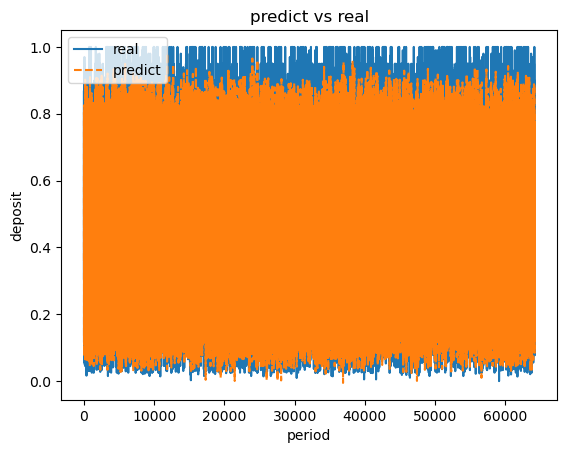

In [52]:
plt.plot(result['보증금'], label='real')
plt.plot(result['예측값'], linestyle='--', label='predict')
plt.title('predict vs real')
plt.xlabel('period')
plt.ylabel('deposit')
plt.legend()
plt.show()

In [ ]:
'''
# 본래값 확인해보기
# 201601
print('실제값 : ',0.362120 * (100000.0-500.0)+500)
print('예측값 : ',0.362928 * (100000.0-500.0)+500)

#201602
print('실제값 : ',0.362120 * (100000.0-500.0)+500)
print('예측값 : ',0.362928 * (100000.0-500.0)+500)

# 201603
print('실제값 : ',0.344907 * (100000.0-500.0)+500)
print('예측값 : ',0.350313 * (100000.0-500.0)+500)
'''

In [53]:
result2 = pd.DataFrame({
  '계약년월': ['201601', '201602', '201603', '201604', '201605', '201606','201607', '201608', '201609','201610', '201611', '201612', 
                 '201701', '201702', '201703', '201704', '201705', '201706', '201707', '201708', '201709', '201710', '201711', '201712',
                 '201801', '201802', '201803', '201804', '201805', '201806', '201807', '201808', '201809', '201810', '201811', '201812'],
  '실제값': [0.362036 * (100000.0-500.0)+500, 0.349106 * (100000.0-500.0)+500, 0.339397 * (100000.0-500.0)+500,
              0.340450 * (100000.0-500.0)+500, 0.356833 * (100000.0-500.0)+500, 0.365469 * (100000.0-500.0)+500,
              0.361781 * (100000.0-500.0)+500, 0.352823 * (100000.0-500.0)+500, 0.371977 * (100000.0-500.0)+500,
              0.391995 * (100000.0-500.0)+500, 0.391071 * (100000.0-500.0)+500, 0.399309 * (100000.0-500.0)+500,
          
              0.399908 * (100000.0-500.0)+500, 0.377900 * (100000.0-500.0)+500, 0.371280 * (100000.0-500.0)+500,
              0.375838 * (100000.0-500.0)+500, 0.380670 * (100000.0-500.0)+500, 0.381322 * (100000.0-500.0)+500,
              0.383500 * (100000.0-500.0)+500, 0.380717 * (100000.0-500.0)+500, 0.386610 * (100000.0-500.0)+500,
              0.394348 * (100000.0-500.0)+500, 0.407041 * (100000.0-500.0)+500, 0.417000 * (100000.0-500.0)+500,
          
              0.411630 * (100000.0-500.0)+500, 0.402937 * (100000.0-500.0)+500, 0.395211 * (100000.0-500.0)+500,          
              0.394131 * (100000.0-500.0)+500, 0.392713 * (100000.0-500.0)+500, 0.408404 * (100000.0-500.0)+500,
              0.396198 * (100000.0-500.0)+500, 0.393102 * (100000.0-500.0)+500, 0.408940 * (100000.0-500.0)+500,
              0.416062 * (100000.0-500.0)+500, 0.429393 * (100000.0-500.0)+500, 0.427455 * (100000.0-500.0)+500 ],
    
  '예측값': [0.364430 * (100000.0-500.0)+500, 0.355331 * (100000.0-500.0)+500, 0.344836 * (100000.0-500.0)+500,
              0.344801 * (100000.0-500.0)+500, 0.360296 * (100000.0-500.0)+500, 0.368740 * (100000.0-500.0)+500,
              0.369037 * (100000.0-500.0)+500, 0.360058 * (100000.0-500.0)+500, 0.371635 * (100000.0-500.0)+500,
              0.391146 * (100000.0-500.0)+500, 0.391518 * (100000.0-500.0)+500, 0.399471 * (100000.0-500.0)+500,
          
              0.407167 * (100000.0-500.0)+500, 0.387947 * (100000.0-500.0)+500, 0.380583 * (100000.0-500.0)+500,
              0.385857 * (100000.0-500.0)+500, 0.387467 * (100000.0-500.0)+500, 0.384233 * (100000.0-500.0)+500,
              0.383780 * (100000.0-500.0)+500, 0.380020 * (100000.0-500.0)+500, 0.382910 * (100000.0-500.0)+500,
              0.388969 * (100000.0-500.0)+500, 0.402214 * (100000.0-500.0)+500, 0.414445 * (100000.0-500.0)+500,
          
              0.418299 * (100000.0-500.0)+500, 0.408301 * (100000.0-500.0)+500, 0.399575 * (100000.0-500.0)+500,
              0.402781 * (100000.0-500.0)+500, 0.404885 * (100000.0-500.0)+500, 0.416766 * (100000.0-500.0)+500,
              0.406452 * (100000.0-500.0)+500, 0.398670 * (100000.0-500.0)+500, 0.403838 * (100000.0-500.0)+500,
              0.413826 * (100000.0-500.0)+500, 0.424666 * (100000.0-500.0)+500, 0.434478 * (100000.0-500.0)+500 ]
})

In [54]:
result2

,계약년월,실제값,예측값
0,201601,36522.5820,36760.7850
1,201602,35236.0470,35855.4345
2,201603,34270.0015,34811.1820
3,201604,34374.7750,34807.6995
4,201605,36004.8835,36349.4520
5,201606,36864.1655,37189.6300
6,201607,36497.2095,37219.1815
7,201608,35605.8885,36325.7710
8,201609,37511.7115,37477.6825
9,201610,39503.5025,39419.0270


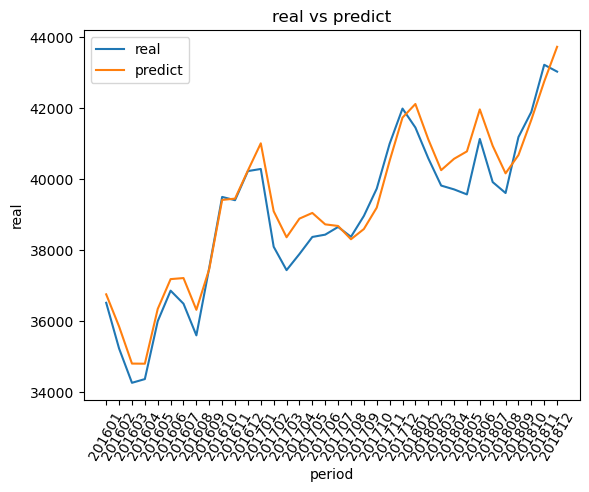

In [179]:
plt.plot(result2['계약년월'], result2['실제값'], label='real')
plt.plot(result2['계약년월'], result2['예측값'], label='predict')

plt.xlabel('period')
plt.ylabel('real')
plt.title('real vs predict')
plt.xticks(rotation=60)
plt.legend()

plt.show()

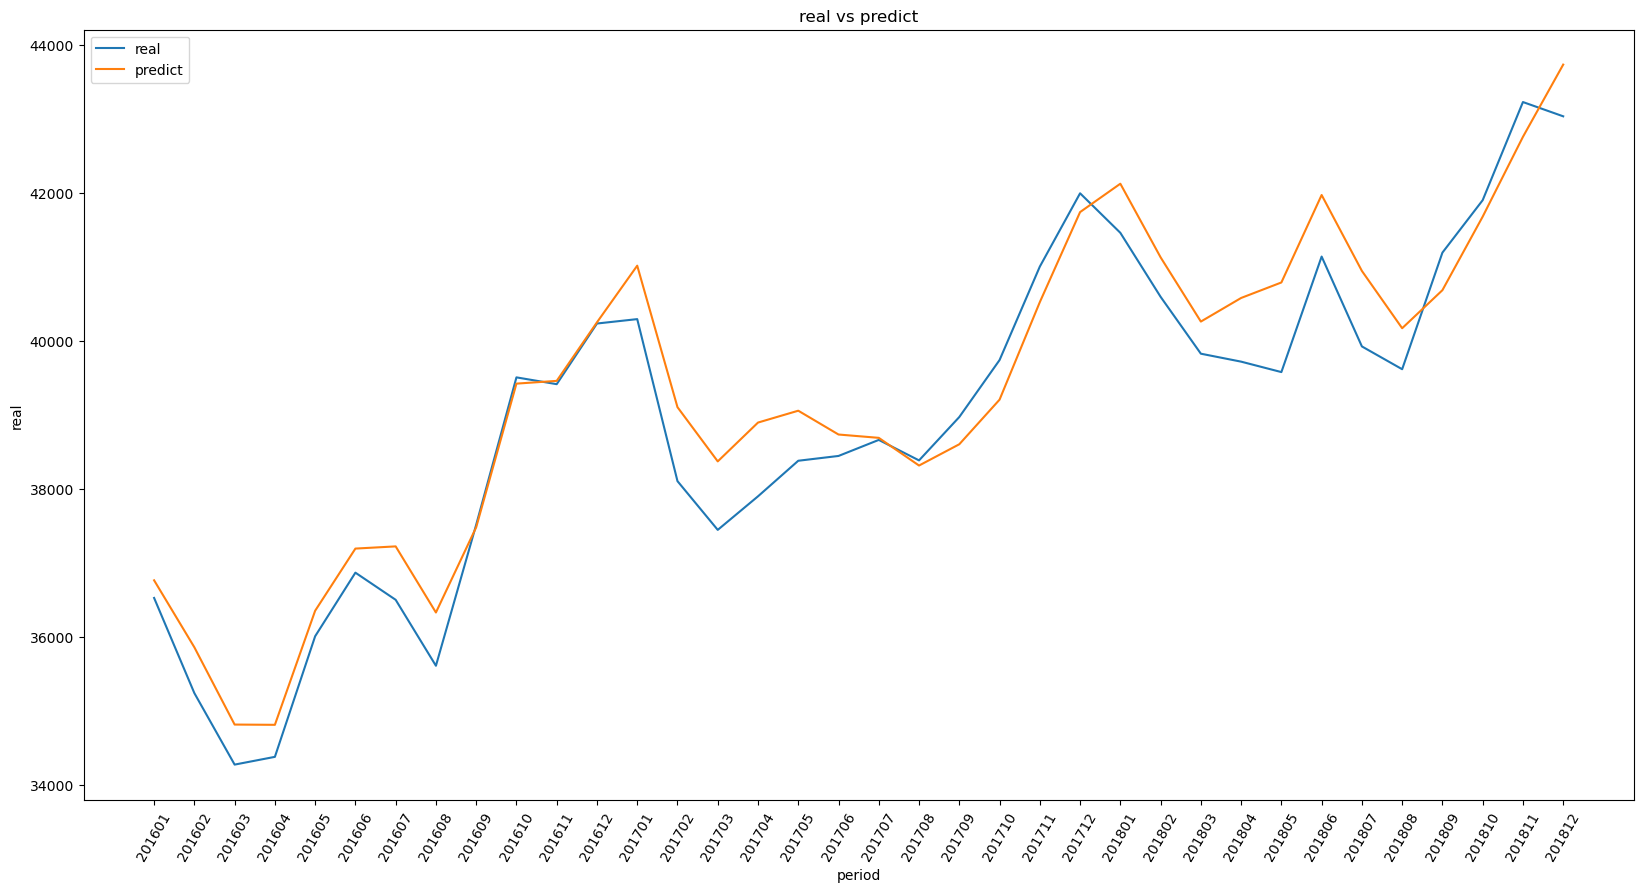

In [176]:
plt.figure(figsize=(20, 10))
plt.plot(result2['계약년월'], result2['실제값'], label='real')
plt.plot(result2['계약년월'], result2['예측값'], label='predict')

plt.xlabel('period')
plt.ylabel('real')
plt.title('real vs predict')
plt.legend()

plt.xticks(rotation=60)

plt.show()

In [276]:
plt.plot(data['예측값'])
plt.plot(predictions)
plt.plot(np.poly1d(np.polyfit(data['예측값'][-10:].values, predictions, 1))(data['예측값'].index[-10:]))
plt.title('예측값 예측과 추세선')
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

,보증금,예측값
0,NaN,36760.7850
1,NaN,35855.4345
2,NaN,34811.1820
3,NaN,34807.6995
4,NaN,36349.4520


In [40]:
result2.to_csv('../data/result2.csv', index=False)

In [ ]:

plt.plot(result2['계약년월'], result2['실제값'], label='real')
plt.plot(result2['계약년월'], result2['예측값'], label='predict')

plt.xlabel('period')
plt.ylabel('real')
plt.title('real vs predict')
plt.legend()

plt.xticks(rotation=60)

plt.show()

In [163]:
# 예측용 데이터
pdf = pd.read_csv('../data/pre1920212223.csv', low_memory=False, dtype={'status': 'category'})

# 정규화하기
# MinMaxScaler 클래스 생성
scaler = MinMaxScaler()

# MinMaxScaler 클래스의 fit_transform() 메서드 사용 데이터 정규화
normalized_data = scaler.fit_transform(pdf)

# 정규화된 데이터, 데이터 프레임으로 다시 변환
npdf = pd.DataFrame(normalized_data, columns=pdf.columns)

#나누기
X = npdf.iloc[:, :-1]
y = npdf.iloc[:,[-1]]

In [164]:
predict = model.predict(X)

18437/18437 [==============================] - 35s 2ms/step


In [126]:
npdf['예측값'] = predict

In [127]:
npdf.head()

,동,단지명,전용면적,계약년월,층,건축년도,금리,부동산소비심리,보증금,예측값
0,0.248503,0.360789,0.226840,0.0,0.112903,0.419355,0.416667,0.658537,0.407035,0.363735
1,0.248503,0.360789,0.226840,0.0,0.096774,0.419355,0.416667,0.658537,0.376884,0.361316
2,0.248503,0.081402,0.490748,0.0,0.161290,0.370968,0.416667,0.658537,0.899497,0.756668
3,0.248503,0.081402,0.306504,0.0,0.258065,0.370968,0.416667,0.658537,0.547739,0.564928
4,0.248503,0.313742,0.237262,0.0,0.112903,0.354839,0.416667,0.658537,0.507538,0.352990


In [81]:
result_pd = npdf.groupby('계약년월').mean()
result_pd = result_pd[['보증금', '예측값']]

In [75]:
print(result_pd)

               보증금       예측값
계약년월                        
0.000000  0.415984  0.376248
0.002469  0.407865  0.371698
0.004938  0.385000  0.354886
0.007407  0.391755  0.357149
0.009877  0.395543  0.359043
0.012346  0.390687  0.351432
0.014815  0.400583  0.356775
0.017284  0.389876  0.349564
0.019753  0.396109  0.351348
0.022222  0.410452  0.359767
0.024691  0.429113  0.370838
0.027160  0.429334  0.366316
0.246914  0.416391  0.365605
0.249383  0.409886  0.358973
0.251852  0.401737  0.351195
0.254321  0.400787  0.347981
0.256790  0.415904  0.359567
0.259259  0.438407  0.370989
0.261728  0.435510  0.363884
0.264198  0.424033  0.347265
0.266667  0.434940  0.347556
0.269136  0.452320  0.356986
0.271605  0.471678  0.364956
0.274074  0.482153  0.367814
0.493827  0.470985  0.370540
0.496296  0.461715  0.367719
0.498765  0.448564  0.353492
0.501235  0.453900  0.355780
0.503704  0.480604  0.369871
0.506173  0.463929  0.349808
0.508642  0.471621  0.352895
0.511111  0.443968  0.342644
0.513580  0.45

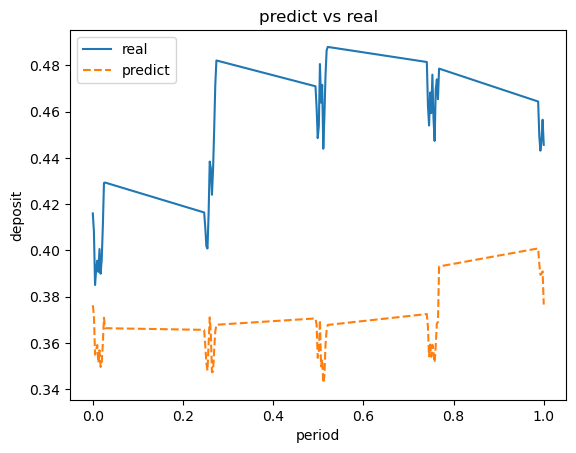

In [76]:
plt.plot(result_pd['보증금'], label='real')
plt.plot(result_pd['예측값'], linestyle='--', label='predict')
plt.title('predict vs real')
plt.xlabel('period')
plt.ylabel('deposit')
plt.legend()
plt.show()

In [ ]:
result_p = pd.DataFrame({
  '계약년월': ['201901', '201902', '201903', '201904', '201905', '201906','201907', '201908', '201909','201910', '201911', '201912', 
                 '202001', '202002', '202003', '202004', '202005', '202006', '202007', '202008', '202009', '202010', '202011', '202012',
                 '202101', '202102', '202103', '202104', '202105', '202106', '202107', '202108', '202109', '202110', '202111', '202112',
                 '202201', '202202', '202203', '202204', '202205', '202206', '202207', '202208', '202209', '202210', '202211', '202212',
                 '202301', '202302', '202303', '202304', '202305', '202306'],
  '실제값': [0.362036 * (100000.0-500.0)+500, 0.349106 * (100000.0-500.0)+500, 0.339397 * (100000.0-500.0)+500,
              0.340450 * (100000.0-500.0)+500, 0.356833 * (100000.0-500.0)+500, 0.365469 * (100000.0-500.0)+500,
              0.361781 * (100000.0-500.0)+500, 0.352823 * (100000.0-500.0)+500, 0.371977 * (100000.0-500.0)+500,
              0.391995 * (100000.0-500.0)+500, 0.391071 * (100000.0-500.0)+500, 0.399309 * (100000.0-500.0)+500,
          
              0.399908 * (100000.0-500.0)+500, 0.377900 * (100000.0-500.0)+500, 0.371280 * (100000.0-500.0)+500,
              0.375838 * (100000.0-500.0)+500, 0.380670 * (100000.0-500.0)+500, 0.381322 * (100000.0-500.0)+500,
              0.383500 * (100000.0-500.0)+500, 0.380717 * (100000.0-500.0)+500, 0.386610 * (100000.0-500.0)+500,
              0.394348 * (100000.0-500.0)+500, 0.407041 * (100000.0-500.0)+500, 0.417000 * (100000.0-500.0)+500,
          
              0.411630 * (100000.0-500.0)+500, 0.402937 * (100000.0-500.0)+500, 0.395211 * (100000.0-500.0)+500,          
              0.394131 * (100000.0-500.0)+500, 0.392713 * (100000.0-500.0)+500, 0.408404 * (100000.0-500.0)+500,
              0.396198 * (100000.0-500.0)+500, 0.393102 * (100000.0-500.0)+500, 0.408940 * (100000.0-500.0)+500,
              0.416062 * (100000.0-500.0)+500, 0.429393 * (100000.0-500.0)+500, 0.427455 * (100000.0-500.0)+500 
         
              0.362036 * (100000.0-500.0)+500, 0.349106 * (100000.0-500.0)+500, 0.339397 * (100000.0-500.0)+500,
              0.340450 * (100000.0-500.0)+500, 0.356833 * (100000.0-500.0)+500, 0.365469 * (100000.0-500.0)+500,
              0.361781 * (100000.0-500.0)+500, 0.352823 * (100000.0-500.0)+500, 0.371977 * (100000.0-500.0)+500,
              0.391995 * (100000.0-500.0)+500, 0.391071 * (100000.0-500.0)+500, 0.399309 * (100000.0-500.0)+500,
          
              0.361781 * (100000.0-500.0)+500, 0.352823 * (100000.0-500.0)+500, 0.371977 * (100000.0-500.0)+500,
              0.391995 * (100000.0-500.0)+500, 0.391071 * (100000.0-500.0)+500, 0.399309 * (100000.0-500.0)+500,
         ],
    
  '예측값': [0.364430 * (100000.0-500.0)+500, 0.355331 * (100000.0-500.0)+500, 0.344836 * (100000.0-500.0)+500,
              0.344801 * (100000.0-500.0)+500, 0.360296 * (100000.0-500.0)+500, 0.368740 * (100000.0-500.0)+500,
              0.369037 * (100000.0-500.0)+500, 0.360058 * (100000.0-500.0)+500, 0.371635 * (100000.0-500.0)+500,
              0.391146 * (100000.0-500.0)+500, 0.391518 * (100000.0-500.0)+500, 0.399471 * (100000.0-500.0)+500,
          
              0.407167 * (100000.0-500.0)+500, 0.387947 * (100000.0-500.0)+500, 0.380583 * (100000.0-500.0)+500,
              0.385857 * (100000.0-500.0)+500, 0.387467 * (100000.0-500.0)+500, 0.384233 * (100000.0-500.0)+500,
              0.383780 * (100000.0-500.0)+500, 0.380020 * (100000.0-500.0)+500, 0.382910 * (100000.0-500.0)+500,
              0.388969 * (100000.0-500.0)+500, 0.402214 * (100000.0-500.0)+500, 0.414445 * (100000.0-500.0)+500,
          
              0.418299 * (100000.0-500.0)+500, 0.408301 * (100000.0-500.0)+500, 0.399575 * (100000.0-500.0)+500,
              0.402781 * (100000.0-500.0)+500, 0.404885 * (100000.0-500.0)+500, 0.416766 * (100000.0-500.0)+500,
              0.406452 * (100000.0-500.0)+500, 0.398670 * (100000.0-500.0)+500, 0.403838 * (100000.0-500.0)+500,
              0.413826 * (100000.0-500.0)+500, 0.424666 * (100000.0-500.0)+500, 0.434478 * (100000.0-500.0)+500,
          
              0.362036 * (100000.0-500.0)+500, 0.349106 * (100000.0-500.0)+500, 0.339397 * (100000.0-500.0)+500,
              0.340450 * (100000.0-500.0)+500, 0.356833 * (100000.0-500.0)+500, 0.365469 * (100000.0-500.0)+500,
              0.361781 * (100000.0-500.0)+500, 0.352823 * (100000.0-500.0)+500, 0.371977 * (100000.0-500.0)+500,
              0.391995 * (100000.0-500.0)+500, 0.391071 * (100000.0-500.0)+500, 0.399309 * (100000.0-500.0)+500,
          
              0.361781 * (100000.0-500.0)+500, 0.352823 * (100000.0-500.0)+500, 0.371977 * (100000.0-500.0)+500,
              0.391995 * (100000.0-500.0)+500, 0.391071 * (100000.0-500.0)+500, 0.399309 * (100000.0-500.0)+500]
})

In [88]:
df_2 = pd.DataFrame(result_pd, columns=['보증금', '예측값'])
df_2.head()

,보증금,예측값
계약년월,,
0.000000,0.415984,0.376248
0.002469,0.407865,0.371698
0.004938,0.385000,0.354886
0.007407,0.391755,0.357149
0.009877,0.395543,0.359043


In [89]:
# De-Normalization
original_min_value = 500
original_max_value = 100000

df_22 = df_2 * (original_max_value - original_min_value) + original_min_value

print(df_22)

                   보증금           예측값
계약년월                                
0.000000  41890.362246  37936.682135
0.002469  41082.608584  37483.905733
0.004938  38807.532568  35811.126888
0.007407  39479.658117  36036.358610
0.009877  39856.532348  36224.790573
0.012346  39373.383996  35467.447981
0.014815  40357.974111  35999.102190
0.017284  39292.656927  35281.622544
0.019753  39912.886548  35459.088713
0.022222  41339.977371  36296.797708
0.024691  43196.708639  37398.347035
0.027160  43218.746205  36948.488519
0.246914  41930.931038  36877.661586
0.249383  41283.645197  36217.777565
0.251852  40472.835372  35443.873599
0.254321  40378.264852  35124.145672
0.256790  41882.452081  36276.903301
0.259259  44121.507086  37413.446501
0.261728  43833.266885  36706.419647
0.264198  42691.331124  35052.897662
0.266667  43776.521525  35081.800744
0.269136  45505.843647  36020.132318
0.271605  47431.943085  36813.165635
0.274074  48474.247925  37097.508267
0.493827  47362.989218  37368.699655
0

In [90]:
result1920212223 = pd.DataFrame(df_22, columns=['보증금', '예측값'])

In [91]:
result1920212223

,보증금,예측값
계약년월,,
0.000000,41890.362246,37936.682135
0.002469,41082.608584,37483.905733
0.004938,38807.532568,35811.126888
0.007407,39479.658117,36036.358610
0.009877,39856.532348,36224.790573
0.012346,39373.383996,35467.447981
0.014815,40357.974111,35999.102190
0.017284,39292.656927,35281.622544
0.019753,39912.886548,35459.088713


In [92]:
result1920212223 = result1920212223.drop('계약년월', axis=1)

KeyError: "['계약년월'] not found in axis"

In [265]:
# 예측용 데이터
pdf = pd.read_csv('../data/allapt.csv', low_memory=False, dtype={'status': 'category'})



# 정규화하기
# MinMaxScaler 클래스 생성
scaler = MinMaxScaler()

# MinMaxScaler 클래스의 fit_transform() 메서드 사용 데이터 정규화
normalized_data = scaler.fit_transform(pdf)


# 정규화된 데이터, 데이터 프레임으로 다시 변환
npdf = pd.DataFrame(normalized_data, columns=pdf.columns)

npdf.head()

,동,단지명,전용면적,계약년월,층,건축년도,금리,부동산소비심리,보증금
0,0.353116,0.349200,0.227372,0.0,0.085714,0.419355,0.333333,0.665131,0.437186
1,0.353116,0.349200,0.227372,0.0,0.071429,0.419355,0.333333,0.665131,0.417085
2,0.353116,0.079334,0.401465,0.0,0.142857,0.370968,0.333333,0.665131,0.798995
3,0.353116,0.079334,0.306981,0.0,0.114286,0.370968,0.333333,0.665131,0.517588
4,0.353116,0.079334,0.306981,0.0,0.071429,0.370968,0.333333,0.665131,0.547739


,동,단지명,전용면적,계약년월,층,건축년도,금리,부동산소비심리,보증금
0,0.353116,0.349200,0.227372,201601,0.085714,0.419355,0.333333,0.665131,0.437186
1,0.353116,0.349200,0.227372,201601,0.071429,0.419355,0.333333,0.665131,0.417085
2,0.353116,0.079334,0.401465,201601,0.142857,0.370968,0.333333,0.665131,0.798995
3,0.353116,0.079334,0.306981,201601,0.114286,0.370968,0.333333,0.665131,0.517588
4,0.353116,0.079334,0.306981,201601,0.071429,0.370968,0.333333,0.665131,0.547739


In [266]:
#나누기
X = npdf.iloc[:, :-1]
y = npdf.iloc[:,[-1]]

In [267]:
X.head()

,동,단지명,전용면적,계약년월,층,건축년도,금리,부동산소비심리
0,0.353116,0.349200,0.227372,0.0,0.085714,0.419355,0.333333,0.665131
1,0.353116,0.349200,0.227372,0.0,0.071429,0.419355,0.333333,0.665131
2,0.353116,0.079334,0.401465,0.0,0.142857,0.370968,0.333333,0.665131
3,0.353116,0.079334,0.306981,0.0,0.114286,0.370968,0.333333,0.665131
4,0.353116,0.079334,0.306981,0.0,0.071429,0.370968,0.333333,0.665131


In [268]:
df_mean = X.groupby('계약년월').mean()

In [269]:
df_mean.describe()

,동,단지명,전용면적,층,건축년도,금리,부동산소비심리
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,0.479245,0.403983,0.206380,0.183743,0.636058,0.312157,0.609558
std,0.018951,0.018732,0.008043,0.003117,0.027001,0.256482,0.226754
min,0.426504,0.356313,0.192652,0.176421,0.583150,0.000000,0.000000
25%,0.468061,0.393957,0.199610,0.181686,0.615294,0.226407,0.451613
50%,0.478634,0.404500,0.206129,0.184094,0.644346,0.251793,0.649002
75%,0.492654,0.417126,0.213607,0.185952,0.654991,0.333333,0.799923
max,0.511871,0.446677,0.223292,0.191630,0.697050,1.000000,1.000000


In [ ]:
model.fit(df_mean, y_train, epochs=40, batch_size=32, verbose=1)

In [ ]:
predict = model.predict(df_mean)

In [141]:
y.head()

,보증금
0,0.437186
1,0.417085
2,0.798995
3,0.517588
4,0.547739


In [167]:
predict = model.predict(X)

28467/28467 [==============================] - 55s 2ms/step


In [168]:
npdf['예측값'] = predict

In [169]:
result_pd = npdf.groupby('계약년월').mean()
result_pd = result_pd[['보증금', '예측값']]

In [170]:
df_all = pd.DataFrame(result_pd, columns=['보증금', '예측값'])
df_all

,보증금,예측값
계약년월,,
0.000000,0.365729,0.353411
0.001418,0.351253,0.345208
0.002837,0.342307,0.336523
0.004255,0.346011,0.338171
0.005674,0.360279,0.353515
...,...,...
0.994326,0.449554,0.393973
0.995745,0.443130,0.390019
0.997163,0.447796,0.388744


In [171]:
# De-Normalization
original_min_value = 500
original_max_value = 100000

df_a = df_all * (original_max_value - original_min_value) + original_min_value

print(df_a)

                   보증금           예측값
계약년월                                
0.000000  36890.038096  35664.357826
0.001418  35449.676327  34848.218650
0.002837  34559.563102  33984.076694
0.004255  34928.067398  34148.062468
0.005674  36347.804235  35674.778000
...                ...           ...
0.994326  45230.592695  39700.271279
0.995745  44591.461834  39306.917146
0.997163  45055.709998  39179.989114
0.998582  45923.364031  39252.853230
1.000000  44840.835736  37895.926625

[90 rows x 2 columns]


In [172]:
result1920212223 = pd.DataFrame(df_a, columns=['보증금', '예측값'])

,보증금,예측값
count,90.000000,90.000000
mean,42310.487528,37213.293012
std,3885.439799,1391.020178
min,34559.563102,33984.076694
25%,39342.197621,36083.311662
50%,41789.014129,37306.645654
75%,45861.590962,38109.049417
max,49057.003881,40596.216410


In [116]:
result1920212223['계약년월']=0

In [173]:
result1920212223['계약년월'] = ['201601', '201602', '201603','201604','201605','201606','201607','201608','201609','201610','201611','201612',
                                          '201701', '201702', '201703','201704','201705','201706','201707','201708','201709','201710','201711','201712',    
                                          '201801', '201802', '201803','201804','201805','201806','201807','201808','201809','201810','201811','201812', 
                                          '201901', '201902', '201903','201904','201905','201906','201907','201908','201909','201910','201911','201912', 
                                          '202001', '202002', '202003','202004','202005','202006','202007','202008','202009','202010','202011','202012', 
                                          '202101', '202102', '202103','202104','202105','202106','202107','202108','202109','202110','202111','202112', 
                                          '202201', '202202', '202203','202204','202205','202206','202207','202208','202209','202210','202211','202212', 
                                          '202301','202302','202303','202304','202305','202306']

In [174]:
result1920212223.head()

,보증금,예측값,계약년월
계약년월,,,
0.000000,36890.038096,35664.357826,201601
0.001418,35449.676327,34848.218650,201602
0.002837,34559.563102,33984.076694,201603
0.004255,34928.067398,34148.062468,201604
0.005674,36347.804235,35674.778000,201605


In [237]:
result1920212223

,보증금,예측값,계약년월
계약년월,,,
0.000000,36890.038096,35664.357826,201601
0.001418,35449.676327,34848.218650,201602
0.002837,34559.563102,33984.076694,201603
0.004255,34928.067398,34148.062468,201604
0.005674,36347.804235,35674.778000,201605
...,...,...,...
0.994326,45230.592695,39700.271279,202302
0.995745,44591.461834,39306.917146,202303
0.997163,45055.709998,39179.989114,202304


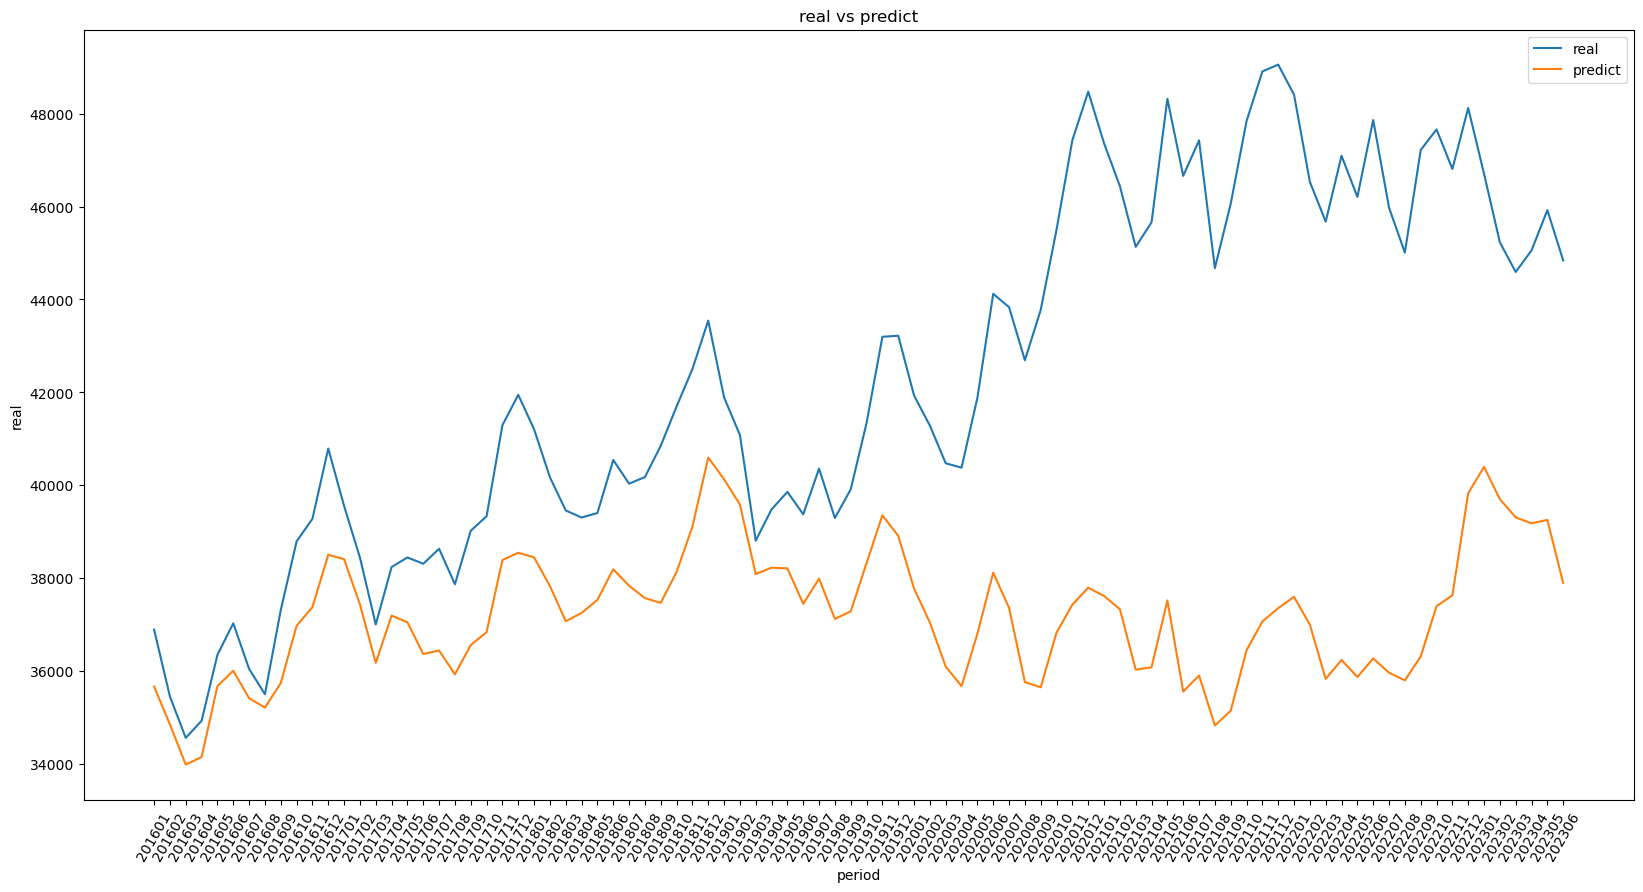

In [175]:
plt.figure(figsize=(20, 10))
plt.plot(result1920212223['계약년월'].str.split('-').str[0], result1920212223['보증금'], label='real')
plt.plot(result1920212223['계약년월'].str.split('-').str[0], result1920212223['예측값'], label='predict')

plt.xlabel('period')
plt.ylabel('real')
plt.title('real vs predict')
plt.legend()

plt.xticks(rotation=60)

plt.show()

In [236]:
result1920212223.to_csv('../data/result1920212223.csv', index=False)

In [238]:
result1920212223['차이'] = result1920212223['보증금'] - result1920212223['예측값']

In [254]:
result1920212223.head(36).describe()

,보증금,예측값,차이
count,36.000000,36.000000,36.000000
mean,38885.356675,36996.910069,1888.446606
std,2187.886923,1412.388751,921.227339
min,34559.563102,33984.076694,287.186990
25%,37239.577431,35986.990295,1040.307146
50%,39148.120942,37132.000998,1941.338422
75%,40267.292005,37910.232864,2470.566238
max,43545.275127,40596.216410,3564.300121


In [240]:
result1920212223.describe()

,보증금,예측값,차이
count,90.000000,90.000000,90.000000
mean,42310.487528,37213.293012,5097.194516
std,3885.439799,1391.020178,3789.463960
min,34559.563102,33984.076694,287.186990
25%,39342.197621,36083.311662,1929.736233
50%,41789.014129,37306.645654,3482.863860
75%,45861.590962,38109.049417,9163.733971
max,49057.003881,40596.216410,11842.994622


In [258]:
result1920212223 = pd.DataFrame(result1920212223, columns=['보증금', '예측값'])

In [259]:
result1920212223

,보증금,예측값
계약년월,,
0.000000,36890.038096,35664.357826
0.001418,35449.676327,34848.218650
0.002837,34559.563102,33984.076694
0.004255,34928.067398,34148.062468
0.005674,36347.804235,35674.778000
...,...,...
0.994326,45230.592695,39700.271279
0.995745,44591.461834,39306.917146
0.997163,45055.709998,39179.989114


In [261]:
data = result1920212223['예측값'].values
data = np.reshape(data, (data.shape[0], 8, 1))

model.fit(data, epochs=10)

ValueError: cannot reshape array of size 90 into shape (90,8,1)

In [255]:
predictions = model.predict(result1920212223['예측값'].values[-90:])

ValueError: in user code:

    File "C:\Users\tjoeun\anaconda3\envs\tf_cpu\lib\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\tjoeun\anaconda3\envs\tf_cpu\lib\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\tjoeun\anaconda3\envs\tf_cpu\lib\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\tjoeun\anaconda3\envs\tf_cpu\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "C:\Users\tjoeun\anaconda3\envs\tf_cpu\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\tjoeun\anaconda3\envs\tf_cpu\lib\site-packages\keras\engine\input_spec.py", line 232, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_2" "                 f"(type Sequential).
    
    Input 0 of layer "lstm_2" is incompatible with the layer: expected ndim=3, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer "sequential_2" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=float32)
      • training=False
      • mask=None


In [ ]:
plt.plot(data['Close'])
plt.plot(predictions)
plt.plot(np.poly1d(np.polyfit(data['예측값'][-10:].values, predictions, 1))(data['Close'].index[-10:]))
plt.title('Stock Price Prediction with Trend Line')
plt.show()